In [18]:
from base_path_cost_evaluator import *
import numpy as np
import time
import matplotlib.pyplot as plt

In [22]:
def mean_curvature(array):
    if len(array) < 3:
        return 0
    # First order difference
    derivative = np.diff(array, axis=0)
    # Second order difference
    derivative2 = np.diff(derivative, axis=0)
    # Magnitude of second order difference
    derivative2_mag = np.linalg.norm(derivative2, axis=1)
    # Mean curvature
    curvature = np.mean(derivative2_mag)
    return curvature

class PathCostEvaluator(BasePathCostEvaluator):

    @cube_path_cost(10)
    def pose_path_cost(self, pose_path):
        return mean_curvature(pose_path)
    
b = PathCostEvaluator(None, None)

path = np.linspace(0, 29, 30)
path = np.sin(path * 0.3)
patha = np.vstack((path, path)).T
pathb = np.linspace(0, 29, 30)
pathb = np.vstack((path, path, path)).T
actual_path = list(zip(patha, pathb))

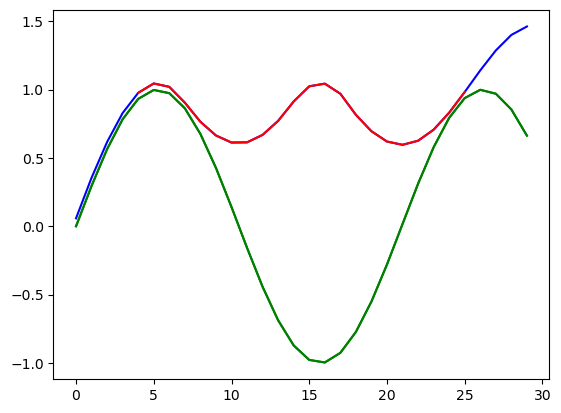

In [29]:
icost = b.compute_local_cost(actual_path, 8, 1)
plt.plot(icost, c='b')
plt.plot(patha, c='g')
x, cost = b.compute_local_costs_non_interpolated(actual_path, 8, 1)
plt.plot(x, cost, c='r')